In [1]:
import numpy as np
import pandas as pd
import read_model_ID_toy as model
import calculate_cleavage_rate_toy as clv
import matplotlib.pylab as plt
import sys
sys.path.append('../')
sys.path.append('../../code_Boyle')
import Nucleaseq_data_processing as processing
reload(model)
reload(clv)
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()

### load experimental data

In [2]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True)

kclv = []
kon = []
i = 1
while i < 20+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0][0])
            kon.append(np.log10(ydata[a][1][0]))
            i = i + 1
    
kclv.append(ydata[0][0][0])
kclv = np.array(kclv)
kon.append(np.log10(ydata[0][1][0]))
kon = np.array(kon)



k_double = np.zeros([20,20])
k_double_on = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = (ydata[a][0][0])
        if len(ydata[a][1]) > 0:
            k_double_on[j-1,i-1] = np.log10(ydata[a][1][0])
        else:
            k_double_on[j-1,i-1] = np.nan
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_double_on_df = pd.DataFrame(k_double_on, index=range(1, 21), columns=range(1, 21))

### construct artificial parameter set and show landscape

Text(0.5,1,'mismatch penalties')

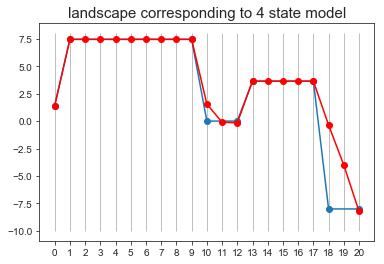

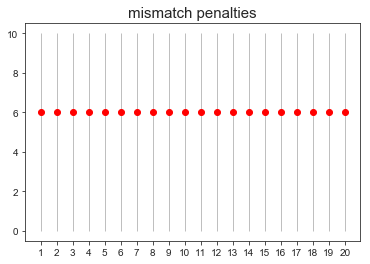

In [70]:
model_id = 'four_state_model_clv_constant_ei+four_state_model_on_constant_ei'
reload(model)
reload(clv)


parameters = np.zeros(10)
parameters[0] = 1.4
parameters[1] = 1.4
parameters[2] = 8.
parameters[3] = 6.045
parameters[4] = 3.637
parameters[5] = 6.#final_par_np[2:22]
parameters[6] = 6.
parameters[7] = -2.4
parameters[-2] = 1.8
parameters[-1] = 3.8

parameters_clv = 0
model_ID_clv, model_ID_on, _, parameters_on = model.combined_model(parameters,model_id)

epsilon, _ = model.unpack_parameters(parameters_on,model_ID_on)

plt.plot([0,1,9,10,12,13,17,18,20],[epsilon[0],epsilon[0] + epsilon[3],epsilon[0] + epsilon[3],epsilon[0]-epsilon[1],epsilon[0]-epsilon[1],epsilon[0]-epsilon[1]+epsilon[4],epsilon[0]-epsilon[1]+epsilon[4],epsilon[0]-epsilon[1]-epsilon[2],epsilon[0]-epsilon[1]-epsilon[2]],marker='o')
plt.vlines(range(0,21),-10,8,linewidth=0.5,color='grey')
plt.xticks(range(0,21),range(0,21));
plt.title('landscape corresponding to 4 state model',fontsize=15)

landscape = np.zeros(21)
landscape[0] = 1.389248 #PAM Boyle, minus PAM Boyle :)
landscape[1:10] = np.ones(9)*7.44538973 #median height
landscape[10:13] = [1.547533, -0.105180, -0.153215] #well defined dip, from Boyle
landscape[13:18] = np.ones(5)*3.6374928 #median height
landscape[18:21] = [-0.361180,-4.009278,-8.223548] #well defined second dip, from Boyle

plt.plot(range(0,21),landscape,marker='o',color='red')

plt.figure()
plt.plot(range(1,21),epsilon[5:25],marker='o',color='red',linewidth=0.)
plt.vlines(range(1,21),0,10,linewidth=0.5,color='grey')
plt.xticks(range(1,21),range(1,21));
plt.title('mismatch penalties',fontsize=15)

Text(34,0.5,'mismatch 2')

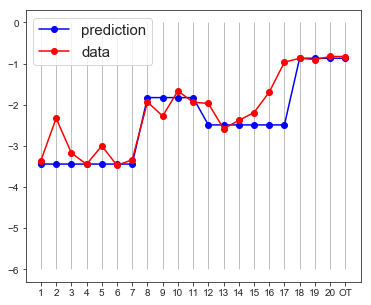

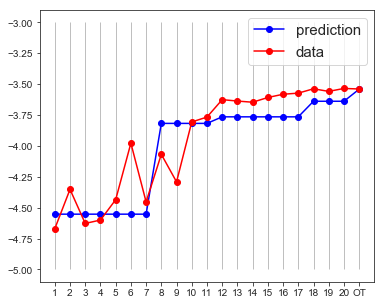

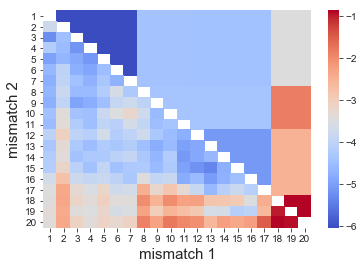

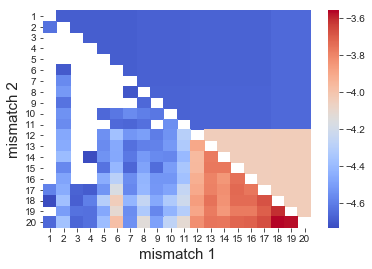

In [71]:
k = np.zeros(21)
k2 = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],k2[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
k[-1],k2[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[]))
    
plt.figure(figsize=[6,5])
plt.plot(range(1,22),k,marker='o',color='b')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
plt.plot(range(1,22),kclv,marker='o',color='r')
plt.legend(['prediction','data'],fontsize=15)

plt.figure(figsize=[6,5])
plt.plot(range(1,22),k2,marker='o',color='b')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
plt.plot(range(1,22),kon,marker='o',color='r')
plt.legend(['prediction','data'],fontsize=15)

k_double = np.zeros([20,20])
k_double2 = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],k_double2[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_on_df = pd.DataFrame(k_double2, index=range(1, 21), columns=range(1, 21))

k_df = k_df + k_double_df
k_on_df = k_on_df + k_double_on_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    k_on_df[i].loc[i]=np.nan
    
plt.figure()
sns.heatmap(k_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

plt.figure()
sns.heatmap(k_on_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

## playing with epsilon i

Text(0.5,1,'mismatch penalties')

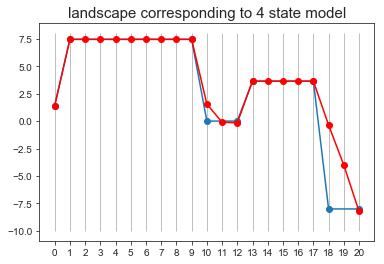

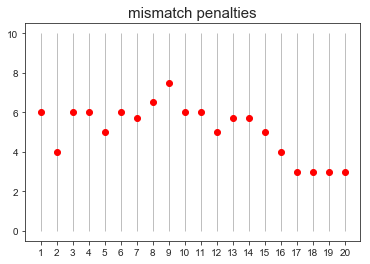

In [84]:
model_id = 'four_state_model_clv+four_state_model_on'
reload(model)
reload(clv)


parameters = np.zeros(28)
parameters[0] = 1.4
parameters[1] = 1.4
parameters[2] = 8.
parameters[3] = 6.045
parameters[4] = 3.637
parameters[5:25] = 6.
parameters[-3] = -2.4
parameters[-2] = 1.8
parameters[-1] = 3.8

#epsiloni
parameters[6] -= 2.
parameters[9] -= 1.
parameters[11] -= .3
parameters[12] += .5 #mismatch 8
parameters[13] += 1.5 #mismatch 9
parameters[16] -= 1.
parameters[17] -= .3
parameters[18] -= .3
parameters[19] -= 1.
parameters[20] -= 2.
parameters[21] -= 3.
parameters[22] -= 3.
parameters[23] -= 3.
parameters[24] -= 3.

parameters_clv = 0
model_ID_clv, model_ID_on, _, parameters_on = model.combined_model(parameters,model_id)

epsilon, _ = model.unpack_parameters(parameters_on,model_ID_on)

plt.plot([0,1,9,10,12,13,17,18,20],[epsilon[0],epsilon[0] + epsilon[3],epsilon[0] + epsilon[3],epsilon[0]-epsilon[1],epsilon[0]-epsilon[1],epsilon[0]-epsilon[1]+epsilon[4],epsilon[0]-epsilon[1]+epsilon[4],epsilon[0]-epsilon[1]-epsilon[2],epsilon[0]-epsilon[1]-epsilon[2]],marker='o')
plt.vlines(range(0,21),-10,8,linewidth=0.5,color='grey')
plt.xticks(range(0,21),range(0,21));
plt.title('landscape corresponding to 4 state model',fontsize=15)

landscape = np.zeros(21)
landscape[0] = 1.389248 #PAM Boyle, minus PAM Boyle :)
landscape[1:10] = np.ones(9)*7.44538973 #median height
landscape[10:13] = [1.547533, -0.105180, -0.153215] #well defined dip, from Boyle
landscape[13:18] = np.ones(5)*3.6374928 #median height
landscape[18:21] = [-0.361180,-4.009278,-8.223548] #well defined second dip, from Boyle

plt.plot(range(0,21),landscape,marker='o',color='red')

plt.figure()
plt.plot(range(1,21),epsilon[5:25],marker='o',color='red',linewidth=0.)
plt.vlines(range(1,21),0,10,linewidth=0.5,color='grey')
plt.xticks(range(1,21),range(1,21));
plt.title('mismatch penalties',fontsize=15)

[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.661

[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.661

[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.66138762 0.        ]
[1.00000000e+03 1.49516753e-01 1.66138762e+00 6.30957344e+03]
[0.00398107 0.14951675 1.661

Text(34,0.5,'mismatch 2')

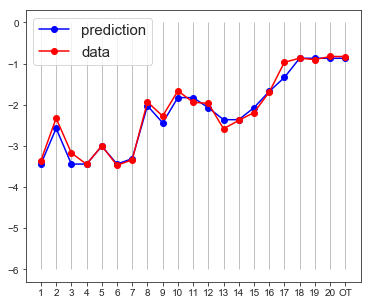

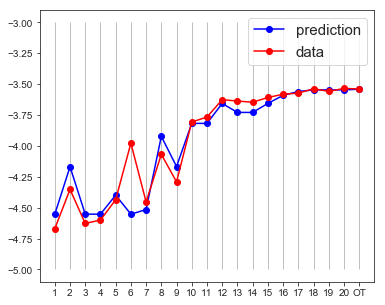

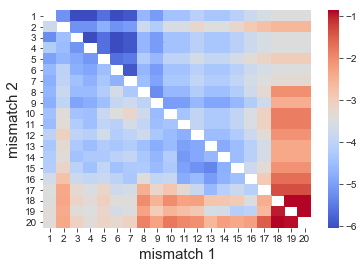

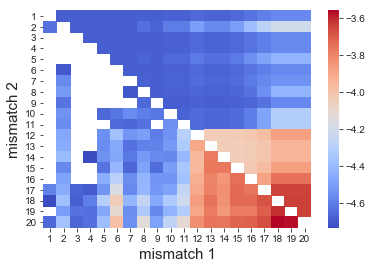

In [85]:
k = np.zeros(21)
k2 = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],k2[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
k[-1],k2[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[]))
    
plt.figure(figsize=[6,5])
plt.plot(range(1,22),k,marker='o',color='b')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
plt.plot(range(1,22),kclv,marker='o',color='r')
plt.legend(['prediction','data'],fontsize=15)

plt.figure(figsize=[6,5])
plt.plot(range(1,22),k2,marker='o',color='b')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
plt.plot(range(1,22),kon,marker='o',color='r')
plt.legend(['prediction','data'],fontsize=15)

k_double = np.zeros([20,20])
k_double2 = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],k_double2[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_on_df = pd.DataFrame(k_double2, index=range(1, 21), columns=range(1, 21))

k_df = k_df + k_double_df
k_on_df = k_on_df + k_double_on_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    k_on_df[i].loc[i]=np.nan
    
plt.figure()
sns.heatmap(k_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

plt.figure()
sns.heatmap(k_on_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

## Rates instead of Barriers

-2.0 2.0


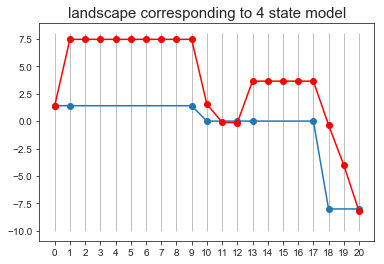

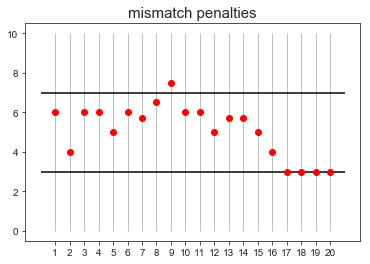

In [96]:
model_id = 'four_state_model_clv_rates+four_state_model_on_rates'
reload(model)
reload(clv)


parameters = np.zeros(27)
parameters[0] = 1.4
parameters[1] = 1.4
parameters[2] = 8.
parameters[3:23] = 6.
parameters[-4] = -2.4
parameters[-3] = -2#1.8+np.log10(np.exp(-6.045))
parameters[-2] = 2#1.8+np.log10(np.exp(-3.637))
parameters[-1] = 3.8

print parameters[-3],parameters[-2]

#epsiloni
parameters[4] -= 2.
parameters[7] -= 1.
parameters[9] -= .3
parameters[10] += .5 #mismatch 8
parameters[11] += 1.5 #mismatch 9
parameters[14] -= 1.
parameters[15] -= .3
parameters[16] -= .3
parameters[17] -= 1.
parameters[18] -= 2.
parameters[19] -= 3.
parameters[20] -= 3.
parameters[21] -= 3.
parameters[22] -= 3.

model_ID_clv, model_ID_on, _, parameters_on = model.combined_model(parameters,model_id)

epsilon, rates = model.unpack_parameters(parameters_on,model_ID_on)

plt.plot([0,1,9,10,12,13,17,18,20],[epsilon[0],epsilon[0] + epsilon[3],epsilon[0] + epsilon[3],epsilon[0]-epsilon[1],epsilon[0]-epsilon[1],epsilon[0]-epsilon[1]+epsilon[4],epsilon[0]-epsilon[1]+epsilon[4],epsilon[0]-epsilon[1]-epsilon[2],epsilon[0]-epsilon[1]-epsilon[2]],marker='o')
plt.vlines(range(0,21),-10,8,linewidth=0.5,color='grey')
plt.xticks(range(0,21),range(0,21));
plt.title('landscape corresponding to 4 state model',fontsize=15)

landscape = np.zeros(21)
landscape[0] = 1.389248 #PAM Boyle, minus PAM Boyle :)
landscape[1:10] = np.ones(9)*7.44538973 #median height
landscape[10:13] = [1.547533, -0.105180, -0.153215] #well defined dip, from Boyle
landscape[13:18] = np.ones(5)*3.6374928 #median height
landscape[18:21] = [-0.361180,-4.009278,-8.223548] #well defined second dip, from Boyle

plt.plot(range(0,21),landscape,marker='o',color='red')

plt.figure()
plt.plot(range(1,21),epsilon[5:25],marker='o',color='red',linewidth=0.)
plt.vlines(range(1,21),0,10,linewidth=0.5,color='grey')
plt.xticks(range(1,21),range(1,21));
plt.title('mismatch penalties',fontsize=15)
plt.hlines([3,7],0,21)

Text(34,0.5,'mismatch 2')

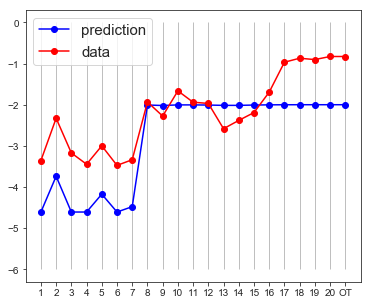

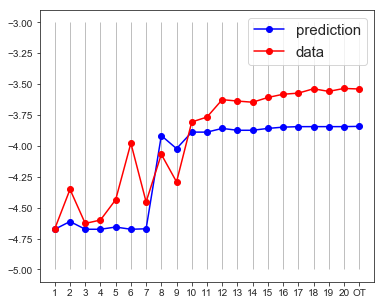

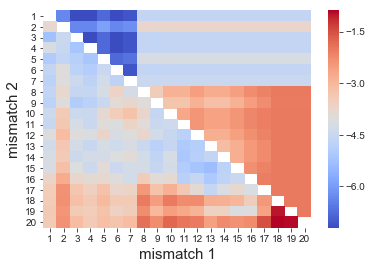

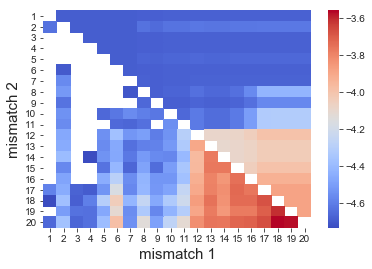

In [97]:
k = np.zeros(21)
k2 = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],k2[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
k[-1],k2[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[]))
    
plt.figure(figsize=[6,5])
plt.plot(range(1,22),k,marker='o',color='b')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
plt.plot(range(1,22),kclv,marker='o',color='r')
plt.legend(['prediction','data'],fontsize=15)

plt.figure(figsize=[6,5])
plt.plot(range(1,22),k2,marker='o',color='b')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
plt.plot(range(1,22),kon,marker='o',color='r')
plt.legend(['prediction','data'],fontsize=15)

k_double = np.zeros([20,20])
k_double2 = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],k_double2[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_on_df = pd.DataFrame(k_double2, index=range(1, 21), columns=range(1, 21))

k_df = k_df + k_double_df
k_on_df = k_on_df + k_double_on_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    k_on_df[i].loc[i]=np.nan
    
plt.figure()
sns.heatmap(k_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

plt.figure()
sns.heatmap(k_on_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)